<a href="https://colab.research.google.com/github/ssuzana/Machine-Learning-Notebooks/blob/main/Batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiple Minima vs Initial Guess

$$f(x)=x^4-4x^2+5$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm,markers

from sympy import symbols, diff

In [ ]:
x = np.linspace(-2,2,1000)

In [ ]:
def f(x):
  return (x**4)-4*(x**2)+5

def df(x):
  return 4*(x**3)-8*x

In [ ]:
def gradient_descent(derivative_func, initial_guess, learning_rate=0.02, precision=0.001, max_iter=500):
  new_x = initial_guess
  x_list = [new_x]
  slope_list = [derivative_func(new_x)]

  for n in range(max_iter):
    previous_x = new_x
    gradient = derivative_func(previous_x)
    new_x = previous_x - learning_rate * gradient

    step_size = abs(new_x - previous_x)
    x_list.append(new_x)
    slope_list.append(derivative_func(new_x))

    if step_size < precision:
      break
  return new_x, x_list, slope_list
    

In [ ]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=df, initial_guess=0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4120887490901561
Number of steps: 34


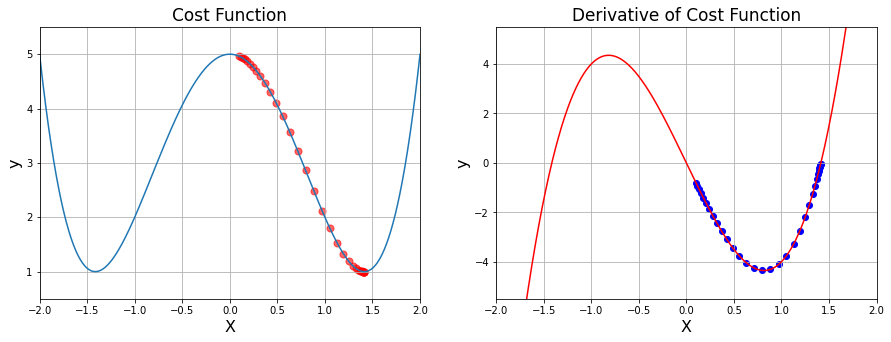

In [ ]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x, f(x))
plt.scatter(list_x, f(np.array(list_x)),color='r', s=50, alpha=0.6)
plt.grid()

plt.subplot(1,2,2)
plt.xlim(-2,2)
plt.ylim(-5.5,5.5)

plt.title('Derivative of Cost Function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.plot(x, df(x),color='r')
plt.scatter(list_x, np.array(deriv_list), color='b')
plt.grid()

plt.show()

#3D Charts

Let $$g(x) = \frac{1}{3^{-x^2-y^2}+1}$$.

In [ ]:
def g(x,y):
  r = -x**2-y**2
  return 1/(3**r+1)

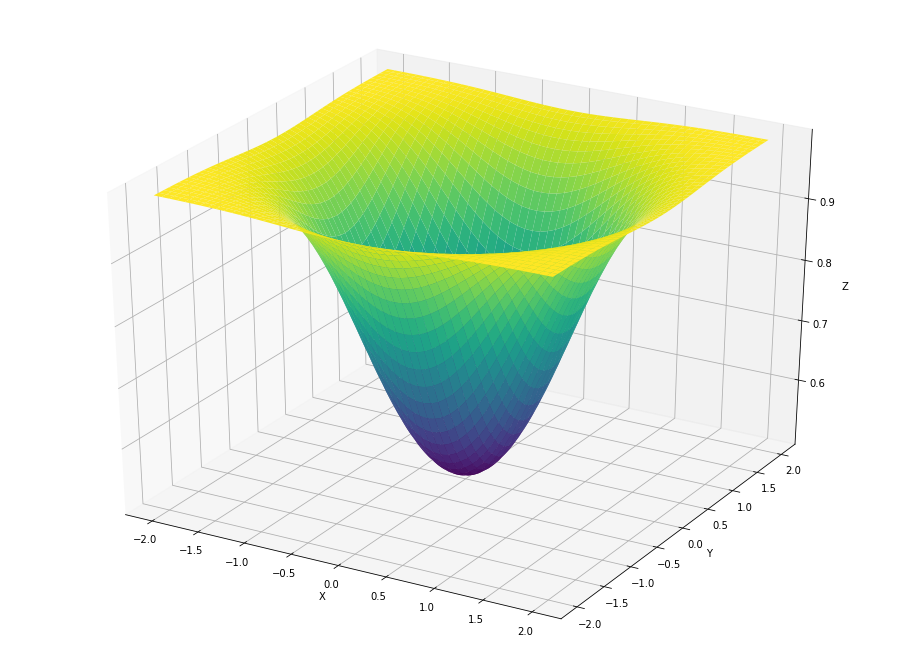

In [ ]:
x1 = np.linspace(start=-2,stop=2,num=200)
y1 = np.linspace(start=-2,stop=2,num=200)

# transform x1 and y1 into 2D arrays so we can plot surface
x1, y1 = np.meshgrid(x1, y1)

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot_surface(x1,y1,g(x1,y1),cmap=cm.viridis)
fig.show()

#Partial Derivatives with SymPy

In [ ]:
x, y = symbols('x y')
print('Our cost function is:')
g(x,y)

Our cost function is:


1/(3**(-x**2 - y**2) + 1)

In [ ]:
# compute partial derivative
print('The partial derivative with respect to x is:')
diff(g(x,y),x)

The partial derivative with respect to x is:


2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [ ]:
# evaluate the partial derivative at (1.8,1)
diff(g(x,y),x).evalf(subs={x:1.8,y:1.0})


0.0368089716197505

In [ ]:
learning_rate = 0.1
max_iter = 300
params = np.array([1.8,1.0]) # initial guess

In [ ]:
for n in range(max_iter):
  partial_x = diff(g(x,y),x).evalf(subs={x:params[0], y:params[1]})
  partial_y = diff(g(x,y),y).evalf(subs={x:params[0], y:params[1]})
  gradient = np.array([partial_x, partial_y])
  params = params - learning_rate * gradient


print('Min occurs at x-value of:', params[0])
print('Min occurs at y-value of', params[1])
print('The cost is:', g(params[0],params[1]))

Min occurs at x-value of: 2.79340868698113e-6
Min occurs at y-value of 1.55189371498952e-6
The cost is: 0.500000000002805


#Gradient Descent without SymPy & 3D Visualization

In [ ]:
# compute partial derivative with respect to x
print('The partial derivative with respect to x is:')
diff(g(x,y),x)

The partial derivative with respect to x is:


2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [ ]:
# evaluate the partial derivative at (1.8,1)
diff(g(x,y),x).evalf(subs={x:1.8,y:1.0})

0.0368089716197505

In [ ]:
# compute partial derivative with respect to y
print('The partial derivative with respect to y is:')
diff(g(x,y),y)

The partial derivative with respect to y is:


2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2

In [ ]:
import math
def gpx(x,y):
  e = -x**2-y**2
  return (2*(3**e)*x*math.log(3))/(3**e+1)**2
def gpy(x,y):  
  e = -x**2-y**2
  return (2*(3**e)*y*math.log(3))/(3**e+1)**2

In [ ]:
gpx(1.8,1)

0.036808971619750504

In [ ]:
learning_rate = 0.1
max_iter = 300
params = np.array([1.8,1.0]) # initial guess
values_array = params.reshape(1,2)


for n in range(max_iter):
  partial_x = gpx(params[0], params[1])
  partial_y = gpy(params[0], params[1])
  gradient = np.array([partial_x, partial_y])
  params = params - learning_rate * gradient
  values_array = np.append(values_array, params.reshape(1,2),axis=0)


print('Min occurs at x-value of:', params[0])
print('Min occurs at y-value of', params[1])
print('The cost is:', g(params[0],params[1]))

Min occurs at x-value of: 2.7934086869811184e-06
Min occurs at y-value of 1.5518937149895096e-06
The cost is: 0.5000000000028046


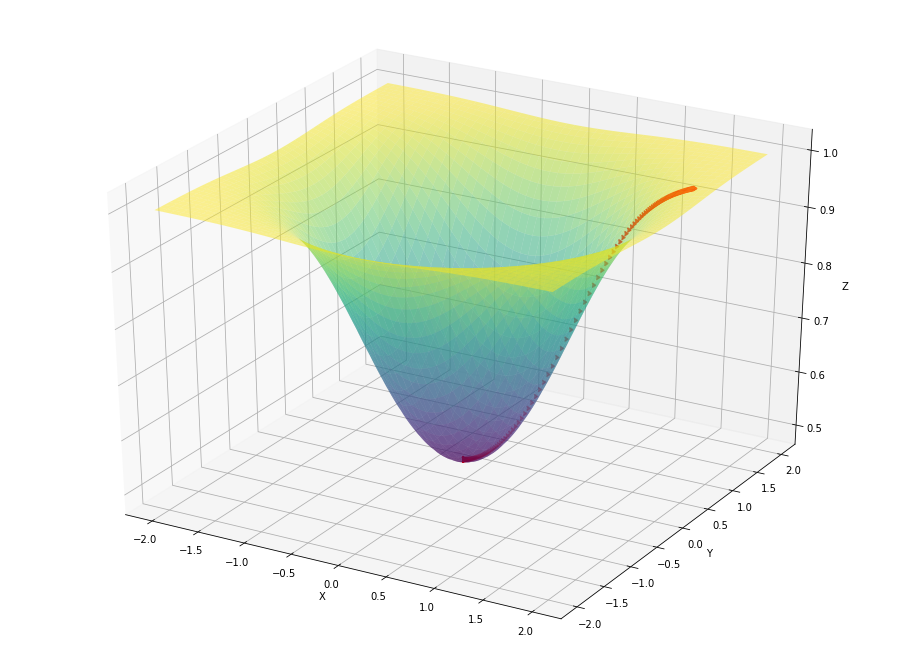

In [ ]:
x1 = np.linspace(start=-2,stop=2,num=200)
y1 = np.linspace(start=-2,stop=2,num=200)

# transform x1 and y1 into 2D arrays so we can plot surface
x1, y1 = np.meshgrid(x1, y1)

fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.plot_surface(x1,y1,g(x1,y1),cmap=cm.viridis, alpha=0.5)

ax.scatter(values_array[:,0], values_array[:,1], g(values_array[:,0],values_array[:,1]),color='r',s=20,marker=5)

fig.show()

# Mean Squared Error: a cost function for regression problems

$$MSE = \frac{1}{n} \sum_{i=1}^n\big(y^{(i)} - h_\theta(x^{(i)})\big)^2$$

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
x = np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y = np.array([1.7,2.4,3.5,3.0,6.1,9.4,8.2]).reshape(7,1)

In [ ]:
regr = LinearRegression()
regr.fit(x,y)
theta0 = regr.intercept_[0]
theta1 = regr.coef_[0][0]
print('theta0: ', theta0)
print('theta1: ', theta1)

theta0:  0.8475351486029545
theta1:  1.2227264637835913


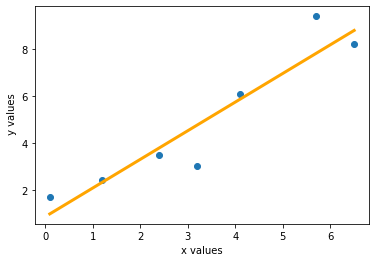

In [ ]:
plt.scatter(x,y)
plt.plot(x, regr.predict(x), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel(' y values')
plt.show()

In [ ]:
y_hat = theta0 + theta1 * x
print(y_hat)

[[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


In [ ]:
def mse(y,y_hat):
  n = len(y)

  return (1/n) * sum((y-y_hat) * (y-y_hat))[0]


In [ ]:
mse(y,y_hat)

0.9479655759794576

In [ ]:
mean_squared_error(y,y_hat)

0.9479655759794577

## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

In [ ]:
# make data for thetas
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


# claculate MSE
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x
        plot_cost[i][j] = mse(y, y_hat)

In [ ]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    
    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [ ]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y, thetas[0] + thetas[1]*x)

for i in range(1000):
    thetas = thetas - multiplier * grad(x, y, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y, thetas[0] + thetas[1]*x))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y, thetas[0] + thetas[1]*x))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: 0.9479751138321333


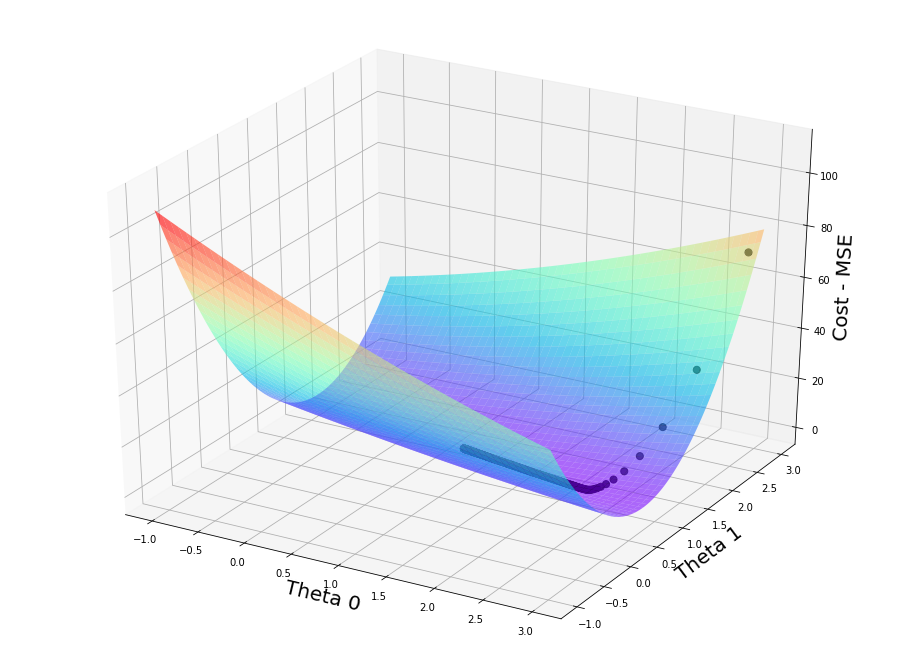

In [ ]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=50, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.6)
plt.show()